In [4]:
import pandas


In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
# using pandas library to read the file

messages= pandas.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['labels','message'])

In [8]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# basic exploratory data analysis

In [10]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [12]:
# new column to detect length of text messages

In [13]:
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
# visualizing the length

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111798eb8>,
      dtype=object)

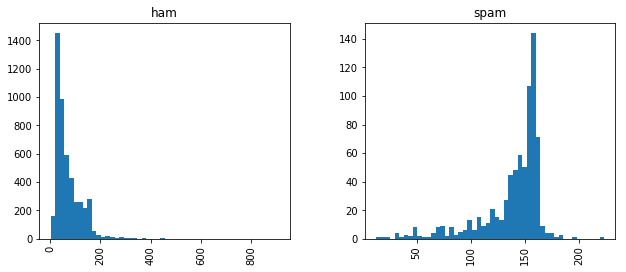

In [16]:
messages.hist(column='length', by='labels', bins=50,figsize=(10,4))

In [17]:
# writing a function to remove punctuation and stopwords from messages
# converting text strings into list of tokens(words)

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
#vectorizing using bag-of-words model
#raw text data can't be used for machine learning algorithm
#text data should be converted in vector of numbers
#bag of words model is used for extracting features from text for use in modeling
#https://machinelearningmastery.com/gentle-introduction-bag-words-model/


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
# using Naive Bayes classifier--linear classifier
#classification is a supervised learning approach in which the computer program learns from the data input given to it and then uses this learning to classify new observation.
from sklearn.naive_bayes import MultinomialNB

In [24]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.cross_validation import train_test_split

/Users/anushreetak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['labels'])

In [27]:
#Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification.
from sklearn.pipeline import Pipeline

In [28]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # feature selection
    ('tfidf', TfidfTransformer()),  # normalization
    ('classifier', MultinomialNB()),  # classification
])

In [29]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a20517400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
predictions = pipeline.predict(msg_test)

In [32]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1265
       spam       0.70      1.00      0.82       128

avg / total       0.97      0.96      0.96      1393

